# Financial: Analysis on Customer data

# Business Objective & Understanding

Customer satisfaction raises the lifetime value of your clients and increases the sales. It also assists you in developing fantastic relationships with your clients.We’ve always heard that the easiest way to expand a company is to keep current clients and then acquire new ones. As a result, most businesses place a premium on maintaining loyal clients and expanding their reach through the cross-sale of other brands. The project's business goal is to assess the success rate of consumer satisfaction by direct marketing efforts conducted by the Portuguese bank to which this data set relates. If a bank can foresee which consumers are more likely to sign up for a new program, they can boost their chances of success (here the program is term deposit).

# Data Understanding

The data set consists of direct marketing campaigning results from a Portuguese bank. The direct campaigning involves their existing customers that have either an account with some balance or personal loan or a housing loan. The data set includes the demographic information about such customers like their job status, marital status, educational details. It also includes direct call campaigning details like contact type, day & month of contact, how long the telephonic conversation took place along with previous campaigning results. As data set involves, only phone calls my research includes the effectiveness of the direct marketing campaign. 
Data set is available at the link - https://www.openml.org/d/1461


In [204]:
# Import required modules

In [205]:
# Importing required modules

import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for measuring accuracy, precision, recall, f1 and auc scores
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for model deployment
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# Importing Data Set

In [ ]:
# creating data file directory
import os
cwd = os.getcwd()
print(cwd)

datadir = os.path.join(cwd, 'Data')
datadirfile = os.path.join(datadir, 'bank-marketing.csv')
print(datadirfile)

In [ ]:
# importing data

bankdf = pd.read_csv(datadirfile)
bankdf.head()

In [186]:
# Exploratory Data Analysis

In [187]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital_status  45211 non-null  object
 3   education       45211 non-null  object
 4   default         45211 non-null  object
 5   balance         45211 non-null  int64 
 6   housing         45211 non-null  object
 7   loan            45211 non-null  object
 8   contact         45211 non-null  object
 9   day             45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  campaign        45211 non-null  int64 
 13  pdays           45211 non-null  int64 
 14  previous        45211 non-null  int64 
 15  poutcome        45211 non-null  object
 16  class           45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [188]:
# Renaming columns appropriately
bankdf.columns = ['age',
'job',
'marital_status',
'education',
'default',
'balance',
'housing',
'loan',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'class']


In [189]:
bankdf.head()
# if need be the renamed data frame can be saved again in csv format. 

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [190]:
bankdf.shape

(45211, 17)

In [191]:
bankdf.describe()

,age,balance,day,duration,campaign,pdays,previous,class
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.0
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.0
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.0
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.0
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,0.0


In [192]:
# Checking for missing values

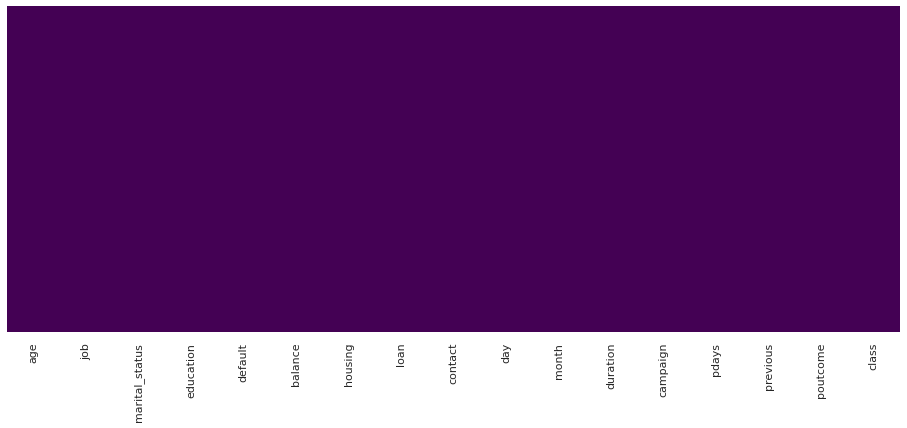

In [193]:
# checking heat map for missing values
plt.figure(figsize=(16, 6))
sns.heatmap(bankdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [194]:
# Checking for blank values for each column
import datetime
now = datetime.datetime.now()

print()
def personal_details():
    name, age = "Rahul Gupta", 680
    address = "Fadi Alsaleem"
    print("Student Name: {}\nCourse: {}\nInstructor: {}".format(name, age, address))

personal_details()

print()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

print()

nullcols = bankdf.isnull().sum()
print(nullcols)


Student Name: Rahul Gupta
Course: 680
Instructor: Fadi Alsaleem

Current date and time : 
2021-04-29 23:51:32

age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
class             0
dtype: int64


In [195]:
All columns are populated in this data set. 

SyntaxError: invalid syntax (<ipython-input-195-70aeee51c12b>, line 1)

In [ ]:
# Getting list of categorical columns
#bankdf.select_dtypes(exclude=['int', 'float']).columns

In [ ]:
# Defining fonts for plotting exploratory data analysis

titlefont = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 16,
        }

labelfont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

In [ ]:
# Exploring counts by each category (of categorical variables)

In [ ]:
Let us the check the count of customers as per term subscription. Note that this is the actual target variable and expected to be in Boolean type.

In [ ]:
print()
def personal_details():
    name, age = "Rahul Gupta", 680
    address = "Fadi Alsaleem"
    print("Student Name: {}\nCourse: {}\nInstructor: {}".format(name, age, address))

personal_details()

print()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

print()

# Draw count plot
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="class", data=bankdf , palette="Set3")


plt.xlabel("Customer Classification", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Records Counts by Customer Classification",fontdict=titlefont , color='r' ))

In [ ]:
The class variable is supposed to be binary, instead it is having values - 1 or 2. This need to be tweaked to 0 or 1.

In [ ]:
# Changing class variable values to 0 (no) or 1 (yes)

import datetime
now = datetime.datetime.now()

print()
def personal_details():
    name, age = "Rahul Gupta", 680
    address = "Fadi Alsaleem"
    print("Student Name: {}\nCourse: {}\nInstructor: {}".format(name, age, address))

personal_details()

print()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))


bankdf.loc[bankdf['class'] == 1, 'class'] = 0    # Changing all NO to 0
bankdf.loc[bankdf['class'] == 2, 'class'] = 1    # Changing all YES to 1

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="job", data=bankdf)

plt.xlabel("Job Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Job", fontdict=titlefont , color='r' )

In [ ]:
bankdf1 = bankdf.groupby(['job', 'class']).size().reset_index().pivot(columns='class', index='job', values=0)
bankdf1

In [ ]:
sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf1.plot(kind='bar', stacked=True)

plt.xlabel("Job Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Job", fontdict=titlefont , color='r' ))


In [ ]:
Top 3 job statuses among the current customers are blue-collar, management, and technician.

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="marital_status", data=bankdf)

plt.xlabel("Marital Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Count of records by Marital Status", fontdict=titlefont , color='r' ))


In [ ]:
bankdf2 = bankdf.groupby(['marital_status', 'class']).size().reset_index().pivot(columns='class', index='marital_status', values=0)
bankdf2

sns.set(style="darkgrid" , palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf2.plot(kind='bar', stacked=True)

plt.xlabel("Marital Jobs", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Marital Status", fontdict=titlefont , color='r' ))

plt.savefig('Maritalstatus.jpeg',
                    format='jpeg',
                    dpi=90)


In [ ]:
Most of the current customers are married as clearly depicted in below bar plot.

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="education", data=bankdf)

plt.xlabel("Education", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Count of records by Education", fontdict=titlefont , color='r' ))

In [ ]:
bankdf3 = bankdf.groupby(['education', 'class']).size().reset_index().pivot(columns='class', index='education', values=0)
bankdf3

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf3.plot(kind='bar', stacked=True)

plt.xlabel("Education", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Education", fontdict=titlefont , color='r' )

In [ ]:
Most of the customers have at least secondary education and tertiary education.

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="default", data=bankdf)

plt.xlabel("Defaulted Earlier?", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Default Status", fontdict=titlefont , color='r' )

In [ ]:
bankdf3 = bankdf.groupby(['default', 'class']).size().reset_index().pivot(columns='class', index='default', values=0)
bankdf3

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [8, 6]
bankdf3.plot(kind='bar', stacked=True)

plt.xlabel("Defaulted Earlier?", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Default status", fontdict=titlefont , color='r' )

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="housing", data=bankdf)

plt.xlabel("Housing Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Housing Loan Status",fontdict=titlefont , color='r' )



In [ ]:
bankdf4 = bankdf.groupby(['housing', 'class']).size().reset_index().pivot(columns='class', index='housing', values=0)
bankdf4

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [8, 6]
bankdf4.plot(kind='bar', stacked=True)

plt.xlabel("Housing Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Housing Loan", fontdict=titlefont , color='r' )

In [ ]:
Most of the current customer bunch does have housing loan with the bank and looks like customers that do not have housing loan with the bank are more likely to subscribe for term deposit.

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="loan", data=bankdf)

plt.xlabel("Personal Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Personal Loan Status",fontdict=titlefont , color='r' )

In [ ]:
bankdf5 = bankdf.groupby(['loan', 'class']).size().reset_index().pivot(columns='class', index='loan', values=0)
bankdf5

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf5.plot(kind='bar', stacked=True)

plt.xlabel("Personal Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Personal Loan", fontdict=titlefont , color='r' )

In [ ]:
Most of the current customer bunch does not have personal loan with the bank and looks like customers that do not have personal loan with the bank are more likely to subscribe for term deposit.

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="contact", data=bankdf)


plt.xlabel("Contact Method", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Contact Method",fontdict=titlefont , color='r' )

In [ ]:
bankdf6 = bankdf.groupby(['contact', 'class']).size().reset_index().pivot(columns='class', index='contact', values=0)
bankdf6

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf6.plot(kind='bar', stacked=True)

plt.xlabel("Contact Method", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Contact Method", fontdict=titlefont , color='r' )

In [ ]:
Most of the customers prefer cellular phone as the primary contact method. It is understandable as cell phones offer flexibility to be carried all the time.  

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="poutcome", data=bankdf)


plt.xlabel("Previous Campaign Outcome", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Previous Campaign Outcome",fontdict=titlefont , color='r' )

In [ ]:
bankdf7 = bankdf.groupby(['poutcome', 'class']).size().reset_index().pivot(columns='class', index='poutcome', values=0)
bankdf7

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf7.plot(kind='bar', stacked=True)

plt.xlabel("Previous Campaign Outcome", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Previous Campaign Outcome", fontdict=titlefont , color='r' )

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="month", data=bankdf)


plt.xlabel("Month", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Count of records by Month",fontdict=titlefont , color='r' )

In [ ]:
bankdf8 = bankdf.groupby(['month', 'class']).size().reset_index().pivot(columns='class', index='month', values=0)
bankdf8

sns.set(style="darkgrid", palette="Set3")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf8.plot(kind='bar', stacked=True)

plt.xlabel("Month", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Month", fontdict=titlefont , color='r' )

In [ ]:
The class variable is supposed to be binary, instead it is having values - 1 or 2. This need to be tweaked to 0 or 1. 

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(16, 6))
sns.distplot(bankdf.balance, kde=True,color="b")

plt.xlabel("Balance", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Balances distribution", fontdict=titlefont , color='r' )

In [ ]:
Balance distribution of the banks current customers is highly skewed with long tail towards higher end of the scale.  We can infer that most of the current customers maintain less than 10,000 balance. 

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="balance", data=bankdf)

plt.xlabel("Balance", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Balances distribution", fontdict=titlefont , color='r' )


In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(16, 6))
sns.distplot(bankdf.duration, kde=True,color="b")

plt.xlabel("Duration", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Call Duration distribution", fontdict=titlefont , color='r' )

In [ ]:
Most of the current customers have spoken for less than 500 seconds during the last call campaign. Which means, the campaign representatives on average must spend less than 10 minutes, to get to know either the customer is interested or not in subscribing to term deposit program. 

In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="duration", data=bankdf)

plt.xlabel("Duration", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Duration distribution", fontdict=titlefont , color='r' )


In [ ]:
sns.set(style="darkgrid", palette="Set3")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="pdays", data=bankdf)

plt.xlabel("Previous contacted date", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Previous contacted date", fontdict=titlefont , color='r' )


In [ ]:
#  Feature Engineering

In [ ]:
The input features actually include a lot of categorical variables. Categorical variables must be encoded to match the predictive models. Here, I used pandas – getdummies() function to create dummy variables for all of the categorical variables.

In [ ]:
bankdf_wdummy = pd.get_dummies(bankdf)
bankdf_wdummy.head()

In [ ]:
bankdf_wdummy.columns

In [ ]:
To avoid dummy variable trap, one dummy variable for each categorical variable should be removed. Below dummy variable columns are removed

'job_unknown', 'marital_status_divorced','education_unknown','default_no','housing_no', 'loan_no', 
'month_dec','contact_unknown', 'poutcome_unknown'

In [ ]:
#The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or
# more variables are highly correlated; in simple terms one variable can be predicted from the others. To demonstrate the Dummy Variable Trap,


# Resolving Dummy Variable Trap



bankdf_wdummy_final = bankdf_wdummy[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 
       'education_primary', 'education_secondary',
       'education_tertiary',  'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular',
       'contact_telephone',  'month_apr', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       ]]


In [ ]:
bankdf_wdummy_final.columns

In [ ]:
bankdf_wdummy_final.shape

In [ ]:
# Feature Selection

In [ ]:
features = bankdf_wdummy_final.loc[ : , bankdf_wdummy_final.columns != 'class' ]
features.head()

In [ ]:
target = bankdf_wdummy_final['class']
target.head()

In [ ]:
Extra Trees Classifier (Extremely Randomized Tress):
    
Random split of random subset features

Bootstrap = False, samples without replacement

Low Variance

In [ ]:
#Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, 
# in some cases, to improve the performance of the model.

# feature selection

import datetime
now = datetime.datetime.now()

print()
def personal_details():
    name, age = "Rahul Gupta", 680
    address = "Fadi Alsaleem"
    print("Student Name: {}\nCourse: {}\nInstructor: {}".format(name, age, address))

personal_details()

print()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

print()


fsmodel = ExtraTreesClassifier(n_estimators=10)
fsmodel.fit(features, target)
impfeatures = fsmodel.feature_importances_
print(impfeatures)
print(features.columns)

In [ ]:
indices = np.argsort(impfeatures)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], impfeatures[indices[f]]))

In [ ]:
## Converting feature importance metric into a data frame for easy read

In [ ]:
impfeatdf = pd.DataFrame(features.columns, impfeatures).reset_index()
impfeatdf.rename(columns = {'index':'featureimportance',0: 'featurename'}, inplace = True)
impfeatdf.sort_values('featureimportance',ascending=False)
#impfeatdf.sort_values('impfeatures',ascending=False)

In [ ]:
# Plotting Cummulative Importance

In [ ]:
# Cumulative importances
impfeatdf['cum_imp'] = np.cumsum(impfeatdf.featureimportance)
impfeatdf

In [ ]:
import datetime
now = datetime.datetime.now()

print()
def personal_details():
    name, age = "Rahul Gupta", 680
    address = "Fadi Alsaleem"
    print("Student Name: {}\nCourse: {}\nInstructor: {}".format(name, age, address))

personal_details()

print()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

xvalues = list(range(len(list(impfeatdf.featureimportance))))

plt.figure(figsize=(14, 8))

# Make a line graph
plt.plot(xvalues, impfeatdf.cum_imp, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(impfeatdf.featureimportance), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(xvalues, impfeatdf.featurename, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variables', fontdict=labelfont)
plt.ylabel('Cumulative Importance', fontdict=labelfont)
plt.title('Cumulative Importances', fontdict=titlefont , color='r' )

In [ ]:
# Feature Selection without dummy encoding

In [ ]:
features_nod = bankdf.loc[ : , bankdf.columns != 'class' ]
features_nod.head()

In [ ]:
target_nod = bankdf['class' ]
target_nod.head()

In [ ]:
# Building Models

In [ ]:
In terms of modelling perspective, the business goal is to define a predictive model involving binary classification of customers into 2 categories – 

1) Customers that might open term deposit account with the bank after the campaign.

2) Customers that will not open term deposit account with the bank.

This classification really helps banks to identify the customers that they can concentrate their campaigning resources on such that it gives them maximum chance to succeed in their campaign resulting in more term deposit accounts (indirectly increasing their program’s success rate).  


In [ ]:
# Why Random Forest?

In [ ]:

Random Forest is an ensemble of decision trees.

1) To begin with, our data has unbalanced classes and Random Forest handles unbalanced data well by minimizing the overall error rate.

2) At each random split of decision tree, the model picks random subset of features, which reduces the correlation between the features selected improving the variance of the model.

3) Random Forest is not affected with the presence of outliers and non- linear data. In the exploratory data analysis, we have observed that the variable ‘balance’ has outliers. By selecting Random Forest, the presence of outliers is negated.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

In [ ]:
Creating Base model with 200 estimators (number of trees), class weight = balanced.


In [ ]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=1,           # for consistent results
                                      n_estimators = 200,       # number of tress in forest
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced"   # for handling imbalanced classes
                                     ) 
# Train model
basemodel = randomforest.fit(X_train, y_train)

In [ ]:
# Calculate feature importances
importances = basemodel.feature_importances_
importances

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
indices

In [ ]:
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
print(names)

In [ ]:
# View out-of-bag-error
randomforest.oob_score_
# 0.9025303763123746 for 200 estimators

In [ ]:
# Predicting the target variable - class
y_pred = basemodel.predict(X_test)

In [ ]:
# Get predicted probabilities
y_prob = basemodel.predict_proba(X_test)[:,1]

In [ ]:
basemodel.predict_proba(X_test)[:,1]

In [ ]:
#basemodel.predict_proba(X_test)

In [ ]:
# Model Evaluation

In [ ]:
# Get accuracy score
randomforest.score(X_test, y_test)

In [ ]:
# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

In [ ]:
# Create pandas dataframe
dataframe = pd.DataFrame(matrix) #, index=class_names, columns=class_names)


# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.xlabel("Predicted Class", fontdict=labelfont)
plt.ylabel("True Class", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Confusion Matrix" , fontdict=titlefont , color='r' )
plt.show()

In [ ]:
# printing classification report
print(classification_report(y_test, y_pred))

In [ ]:
def fn_multiclass_metrics(actual_label, predicted_label):
    """
    function that takes acutal labels and predicted labels and returns
    accuracy, auc, precision, recall and f1 scores
    average = 'weighted' for multi class classification
    """
    accuracy = accuracy_score(actual_label, predicted_label)
    precision = precision_score(actual_label, predicted_label, average = 'weighted')
    recall = recall_score(actual_label, predicted_label, average = 'weighted')
    f1 = f1_score(actual_label, predicted_label, average = 'weighted')

    return (accuracy, precision, recall, f1)

In [ ]:
acc, prec, recall, f1 = fn_multiclass_metrics(y_test, y_pred)

acc, prec, recall, f1


In [ ]:
basemodel.get_params

In [ ]:
As it is a binary classification problem AOC Curve would be a good evaluation metric


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
false_positive_rate, true_positive_rate, thresholds 

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
def plotroc(false_positive_rate, true_positive_rate):

    """
    A function that takes false positive rate and true positive rate for plotting ROC curve
    Returns: none
    Expected o/p: ROC plot
    """

    # Plot ROC curve
    plt.figure(figsize=(12, 8))
    plt.title("Receiver Operating Characteristic", fontdict=titlefont , color='r' )
    plt.plot(false_positive_rate, true_positive_rate,  label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel("True Positive Rate" , fontdict=labelfont)
    plt.xlabel("False Positive Rate", fontdict=labelfont)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Plot ROC curve
plotroc(false_positive_rate, true_positive_rate)

In [ ]:
AUC of 0.93172, indicates that there is 94% chance the model separates between positive class and negative class.

Let us see if it can be further improved with some model tuning. 

In [ ]:
# Calculate area under curve
roc_auc_score(y_test, y_prob)

In [ ]:
# Model Tuning

In [ ]:
Using GridSearchCV which tries every combination of parameter given in the parameter grid, we can find out the best parameters.  Though we might get better accuracy with this approach, it could lot of time to search through all parameters. So, we need to be cautious consider the tradeoff between performance and accuracy before defining the parameters for GridSearchCV.


In [ ]:
import datetime
now = datetime.datetime.now()

print()
def personal_details():
    name, age = "Rahul Gupta", 680
    address = "Fadi Alsaleem"
    print("Student Name: {}\nCourse: {}\nInstructor: {}".format(name, age, address))

personal_details()

print()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 250, 500, 1000, 2000],
    "criterion": ["gini", "entropy"],
     }

# Create a default rf model
rf = RandomForestClassifier(random_state=1,           # for consistent results
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced" )
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
print(best_grid)

In [ ]:
def evaluate(model, X_test, y_test):
    
    """
    function that takes model, test features and test labels 
    prints the model performance metrics
    returns none
    
    """
    print("\n Metrics for model with below parameters :\n")
    print(model.get_params)
    
    # Predicting the target variable - class
    y_pred = model.predict(X_test)
    
    # Get accuracy score
    print("\n Model score :\n")
    print(model.score(X_test, y_test))
    
    acc, prec, recall, f1 = fn_multiclass_metrics(y_test, y_pred)
    
    # printing classification report
    print("\n Classification Report :\n")
    print(classification_report(y_test, y_pred))
    
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    #print( "false_positive_rate, true_positive_rate, thresholds : " )
    plotroc(false_positive_rate, true_positive_rate)
    
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\n ROC AUC :")
    print(roc_auc)
    

    
    return 

In [ ]:
grid_accuracy = evaluate(best_grid, X_test, y_test)

#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
base_accuracy = evaluate(basemodel,  X_test, y_test)

In [ ]:
# Model Deployment

In [ ]:
Once best parameters are obtained through proper tuning new model is created with the best parameters 

Deploying a machine learning model, known as model deployment, simply means to integrate a machine learning model and integrate it into an existing production environment (1) where it can take in an input and return an output.

In [ ]:
print(best_grid)

In [ ]:
Create the model with best parameters obtained from  tuning.

Save the model using joblib module as a pickle.

Deploy the pickle on the server and use it for fitting new unseen data.


In [ ]:
# Create random forest classifier object
bestmodel = RandomForestClassifier(random_state=1,           # for consistent results
                                      n_estimators = 2000,       # number of tress in forest
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced",   # for handling imbalanced classes
                                      criterion='entropy'
                                     ) 


In [ ]:
# Save the model as a pickle in a file 
joblib.dump(bestmodel, 'Model\\bestmodel.pkl') 

In [ ]:
# Load the model from the file 
tunedmodel_from_joblib = joblib.load('Model\\bestmodel.pkl') 


In [ ]:
# Fitting deployed model on new data ( assume here X_train and y_train are new unseen features and targets)
deployed_model = tunedmodel_from_joblib.fit(X_train, y_train)

In [ ]:
# Conclusion

In [ ]:
To conclude using the Random Forest Classifier algorithm and hyper tuning it further using either GridSearchCV or RandomSearchCV, we should be able to determine whether or not the consumer would subscribe to the term deposit service in an effective manner. Next step is to see how the efficiency of the model can be further enhanced by using Deep Learning and Neural Networks